In [1]:
# Импорт необходимых модулей
import os
import pickle
from classes.audio_analyzer import AudioSceneAnalyzer
#from classes.video_analyzer_complex import VideoPipeline
from classes.video_anlyzer_without_faceraid import VideoPipeline
from classes.scene_enricher import SceneEnricher
from classes.openai import OpenAIThemer
from classes.simple_transcriptor import ASRProcessor
from classes.scene_merge import UnifiedSceneMerger
import matplotlib.pyplot as plt
from classes.audioanalyzer_and_transcriptor import AudioAnalyzer

In [2]:
import onnxruntime as ort
print("Available providers:", ort.get_available_providers())
print(ort.get_device())
import torch
print("CUDA доступен:", torch.cuda.is_available())
print("Устройство:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Нет")


Available providers: ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
GPU
CUDA доступен: True
Устройство: NVIDIA GeForce RTX 3070


In [3]:
VIDEO_PATH = "videos/Video_02.avi"          # Путь к видеофайлу
AUDIO_PATH = "temp/temp_audio.wav"           # Временный WAV
OUTPUT_DIR = "output_files/"
TEMP_DIR = "temp/"         # Папка для результатов
CACHE_PATH = os.path.join(TEMP_DIR, "results.pkl")
MIN_SCENE_LENGTH = 2.0                  # Мин. длительность сцены
MAX_SCENE_LENGTH = 300.0                # Макс. допустимая длина сцены (5 мин)


# Анализ видео и выделение сцен

### В этой ячейке мы создаём объект VideoAnalyzer и анализируем видео для получения сцены и лиц, привязанных к трекам.


In [4]:
if os.path.exists(CACHE_PATH):
    print("🔁 Загружаем из кеша...")
    with open(CACHE_PATH, "rb") as f:
        #scenes, track_faces, tracking_frames, track_id_to_person = pickle.load(f)
        scenes, track_faces, tracking_frames = pickle.load(f)

else:
    pipeline = VideoPipeline()
    #scenes, track_faces, tracking_frames, track_id_to_person = pipeline.run(VIDEO_PATH, OUTPUT_DIR)
    scenes, track_faces, tracking_frames = pipeline.run(VIDEO_PATH, OUTPUT_DIR)

    with open(CACHE_PATH, "wb") as f:
        #pickle.dump((scenes, track_faces, tracking_frames, track_id_to_person), f)
        pickle.dump((scenes, track_faces, tracking_frames), f)

d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\torchreid\utils\tools.py:43: UserWarning: No file found at "d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\deep_sort_realtime\embedder\weights\osnet_ain_ms_d_c_wtsonly.pth"
  warnings.warn('No file found at "{}"'.format(fpath))


Successfully loaded imagenet pretrained weights from "C:\Users\Dell/.cache\torch\checkpoints\osnet_ain_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Model: osnet_ain_x1_0
- params: 2,193,616
- flops: 978,878,352


Computing embeddings:   0%|          | 0/24826 [00:00<?, ?it/s]d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
Analyzing scenes: 100%|██████████| 1248/1248 [15:14<00:00,  1.36it/s] 


✅ Отчёт сохранён: reports\Video_02_video_report.json


# Анализ аудио: распознавание речи и активность

### Используем AudioAnalyzer для транскрибирования речи и измерения активности звука (энергии).

🎧 Извлечение аудио...
✅ Аудио сохранено: output_files/temp_audio.wav
📦 Загрузка моделей...




✅ Модели загружены
🔍 OpenL3: извлечение признаков...
33/33 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step
✅ Получено 1035 признаков
🔊 YAMNet: извлечение классов...
✅ Получено 2155 меток
📈 RMS: расчёт...
✅ RMS рассчитано: 89099 значений
✂️ Детектирование сцен...


🚧 Анализ: 100%|██████████| 1034/1034 [00:00<00:00, 2808.70it/s]


✅ Найдено 39 границ сцен
📝 Распознавание речи (Whisper)...


d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\whisper\model.py:124: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  a = scaled_dot_product_attention(
d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\whisper\timing.py:42: UserWarning: Failed to launch Triton kernels, likely due to missing CUDA toolkit; falling back to a slower median kernel implementation...
  warnings.warn(
d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\whisper\timing.py:146: UserWarning: Failed to launch Triton kernels, likely due to missing CUDA toolkit; falling back to a slower DTW implementation...
  warnings.warn(


[00:45.320 --> 00:46.720]  ПОЗИТИВНАЯ МУЗЫКА


d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\whisper\timing.py:42: UserWarning: Failed to launch Triton kernels, likely due to missing CUDA toolkit; falling back to a slower median kernel implementation...
  warnings.warn(
d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\whisper\timing.py:146: UserWarning: Failed to launch Triton kernels, likely due to missing CUDA toolkit; falling back to a slower DTW implementation...
  warnings.warn(


[01:08.440 --> 01:11.240]  НАПРЯЖЕННАЯ МУЗЫКА
[01:11.240 --> 01:20.280]  НАПРЯЖЕННАЯ МУЗЫКА
[01:26.060 --> 01:30.420]  Молочина Уэса. Она мурлычит, как котенок. Не подведет.
[01:42.980 --> 01:45.040]  Сигнал в норме не то, что в прошлый раз.
[01:45.280 --> 01:47.200]  Ну да, после обновления помехи исчезли.
[01:47.600 --> 01:49.500]  Вроде да. И все же надо...
[01:49.500 --> 01:51.840]  Ой! Здрасте.
[01:52.440 --> 01:56.340]  Ну, в чем дело? Чем обязаны?
[01:56.520 --> 02:01.940]  Мои извинения. Наши вечеринки становятся популярными.
[02:03.600 --> 02:05.020]  Артур их гонорар.
[02:08.060 --> 02:09.160]  О, спасибо.
[02:12.240 --> 02:16.960]  Я могу взглянуть. Весьма наслышан.
[02:18.480 --> 02:21.960]  Да. Он великолепен.
[02:22.340 --> 02:23.980]  Да. Она.
[02:25.160 --> 02:30.360]  А-а-а. Разумеется. Извините, Леден.
[02:31.080 --> 02:34.880]  Что вы скажете, если я предложу вам проиграть?
[02:36.940 --> 02:38.760]  Да пошел ты.
[02:39.760 --> 02:43.620]  Не стоит так злиться, дорог

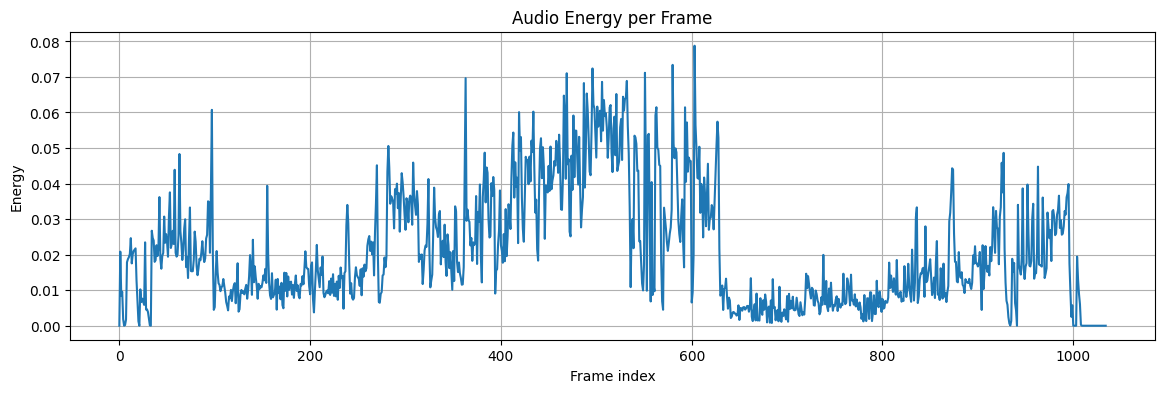

In [4]:
# Запуск анализа
splitter = AudioAnalyzer(
    video_path=VIDEO_PATH,
    output_dir=OUTPUT_DIR,
    whisper_model_size='small'
)
splitter.run(sensitivity=0.88, min_scene_duration=2.0)

segments_short = splitter.segments_short  # для отчётов и группировок
segments_full = splitter.segments   

# Вычисление аудиоэнергии по кадрам
energy = splitter.detect_audio_activity(frame_duration=1.0)

# Визуализация энергии
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(energy)
plt.title("Audio Energy per Frame")
plt.xlabel("Frame index")
plt.ylabel("Energy")
plt.grid(True)
plt.show()


# Обогащение сцен транскриптами и аудио энергией

### Добавляем к сценам распознанный текст и усреднённые показатели звуковой активности.


In [6]:
enricher = SceneEnricher(segments, energy)
#scenes_final = enricher.run(scenes, track_id_to_person)
scenes_final = enricher.run(scenes)
#scenes_final = enricher.run(scene_data, track_id_to_person, print_report=False)


🧠 Загрузка sentence-transformer модели...
✅ SentenceTransformer готов.
🚀 Запуск полного процесса обогащения и группировки...
🎭 Обогащение сцен...
🔊 Добавление речевых сегментов и аудиоэнергии...
✅ Обогащено сцен: 1248
🧩 Группировка сцен методом: semantic
✅ Сцен сгруппировано: 999
🧼 Постобработка: разрешение пересечений и объединение коротких сцен...
✅ Финальное количество сцен после очистки: 50
💾 Сохранение отчета по сценам...
✅ JSON-отчёт по сценам сохранён: reports\scenes_enriched_report.json
📁 JSON-отчет успешно сохранен.
✅ Обработка сцен завершена.


In [7]:
asr = ASRProcessor()
segments_short = asr.process(VIDEO_PATH)


100%|███████████████████████████████████████| 139M/139M [00:34<00:00, 4.23MiB/s]


Распознавание речи для: videos/Video_02.avi


d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\whisper\timing.py:42: UserWarning: Failed to launch Triton kernels, likely due to missing CUDA toolkit; falling back to a slower median kernel implementation...
  warnings.warn(
d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\whisper\timing.py:146: UserWarning: Failed to launch Triton kernels, likely due to missing CUDA toolkit; falling back to a slower DTW implementation...
  warnings.warn(


[00:40.560 --> 00:41.960]  СПОКОЙНАЯ МУЗЫКА
[00:50.980 --> 00:52.380]  СПОКОЙНАЯ МУЗЫКА


d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\whisper\timing.py:42: UserWarning: Failed to launch Triton kernels, likely due to missing CUDA toolkit; falling back to a slower median kernel implementation...
  warnings.warn(
d:\All_projects\TGU_projects\Hackathon\kion_practice-2\venv\lib\site-packages\whisper\timing.py:146: UserWarning: Failed to launch Triton kernels, likely due to missing CUDA toolkit; falling back to a slower DTW implementation...
  warnings.warn(


[01:11.540 --> 01:12.940]  СПОКОЙНАЯ МУЗЫКА
[01:12.940 --> 01:12.940]  СПОКОЙНАЯ МУЗЫКА
[01:22.100 --> 01:22.940]  СПОКОЙНАЯ МУЗЫКА
[01:25.740 --> 01:30.460]  Мой лачина у Вас, она мурулась, как котенок. Не подведет.
[01:39.340 --> 01:39.800]  СПОКОЙНАЯ МУЗЫКА
[01:43.120 --> 01:45.200]  Звенал, норме, не то, что в прошлой разе.
[01:45.360 --> 01:47.200]  Ну да, после обновления поменьхи исчезли.
[01:47.580 --> 01:49.140]  Вроде да, и все же надо.
[01:51.340 --> 01:51.800]  Здрасте.
[01:52.480 --> 01:56.240]  Ну, в чем дело? Чем обязаны?
[01:56.240 --> 01:57.600]  Мои извинения.
[01:58.620 --> 02:01.900]  Наши вечеринки становятся популярными.
[02:02.960 --> 02:05.000]  Нартура их гонорар.
[02:07.940 --> 02:09.100]  О, спасибо.
[02:12.240 --> 02:16.920]  Я могу взглянуть весьма насульшок.
[02:18.620 --> 02:21.840]  Да, он великолепен.
[02:22.340 --> 02:23.980]  Да, она.
[02:23.980 --> 02:30.380]  А, разумеется, извините, Ледин.
[02:31.140 --> 02:34.860]  Что вы скажете, если я предложу 

In [8]:
themer = OpenAIThemer(
        api_key="sk-W9hAXx2k0HSgIC3odXXe18e0DiPLwjNG",  # Добавь свой ключ
        base_url="https://api.proxyapi.ru/openai/v1"
    )
themes = themer.get_themes(segments_short, audio_path=VIDEO_PATH)

❌ Ошибка разбора JSON из ответа модели.
🧠 Тематический отчёт сохранён: reports\Video_02_themes_report.json


In [ ]:
merger = UnifiedSceneMerger("video.mp4")
final_scenes = merger.run()